In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn import metrics
import matplotlib.pyplot as plt

<h2>Import data set<h2>

In [274]:
data=pd.read_csv("Test/Test_500ws.csv")
data
# 0 - Fibrilacion Atrial
# 1 - Congestión cardíaca
# 2 - Infarto al miocardio

,case,record,condition,cond_id,length,ae_mean,ae_variance,ae_skewness,ae_spectral_entropy,se_mean,...,dfa_skewness,dfa_spectral_entropy,psd_mean,psd_variance,psd_skewness,psd_spectral_entropy,hst_mean,hst_variance,hst_skewness,hst_spectral_entropy
0,p010487,3598196_0004,atrial_fibrillation,0,15150,0.900192,0.018845,-0.114595,2.994320,0.745597,...,0.764222,3.357883,0.529958,0.002366,0.379162,3.685299,0.027724,0.004626,5.625475,4.577716
1,p010487,3229491_0002,atrial_fibrillation,0,4083,1.065664,0.027920,0.294537,1.489463,1.085639,...,0.109483,0.695565,0.987843,0.012861,-0.473445,1.520339,0.101575,0.002241,-0.143619,1.038202
2,p000571,3745136_0001,myocardial_infarction,2,23903,0.666117,0.008966,0.360873,3.968331,0.530578,...,0.010522,4.376851,0.577028,0.002209,-0.644626,3.491082,0.105091,0.001386,0.235715,4.160630
3,p000571,3745136_0002,myocardial_infarction,2,10992,0.606582,0.020419,0.222610,3.169244,0.421051,...,-0.364999,2.760570,0.563857,0.007515,-1.532844,2.760707,0.163296,0.008198,0.691350,3.344971
4,p015963,3645793_0020,atrial_fibrillation,0,4153,0.951168,0.206247,-0.516741,1.748789,0.971630,...,0.969715,2.340104,0.774502,0.036759,0.127664,2.073936,0.277998,0.049648,0.158169,2.127785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,p002280,3740206_0008,congestive_heartfailure,1,167960,0.608807,0.008571,-0.315277,5.371391,0.599665,...,-0.085676,5.536675,0.532292,0.010510,-0.822863,4.862602,0.032545,0.000987,0.886077,5.515519
686,p002280,3117261_0001,congestive_heartfailure,1,139419,0.427473,0.020888,-0.705796,3.733412,0.374670,...,-0.059803,3.653461,0.396671,0.018845,-0.198512,3.605640,0.012314,0.000053,7.787296,7.472342
687,p002280,3869118_0001,congestive_heartfailure,1,104600,0.440564,0.021222,0.683250,2.094511,0.433626,...,1.528595,4.711654,0.556377,0.008026,1.855945,5.514917,0.029388,0.001730,6.963801,6.621950
688,p002280,3869118_0002,congestive_heartfailure,1,61078,0.460925,0.024735,0.546145,2.482102,0.434747,...,0.003168,4.377748,0.498249,0.017539,2.737237,4.840577,0.049133,0.003724,6.452557,5.773239


<h2>Clean dataset<h2>

In [275]:
#Extract metrics
data = data[["cond_id","hst_mean","hst_variance","ae_mean","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]

data = data.dropna()
#data = data[ data["hurst"] >= 0.1]
data

,cond_id,hst_mean,hst_variance,ae_mean,ae_variance,ae_skewness,ae_spectral_entropy,se_mean,se_variance,se_skewness,...,hfd_skewness,hfd_spectral_entropy,dfa_mean,dfa_variance,dfa_skewness,dfa_spectral_entropy,psd_mean,psd_variance,psd_skewness,psd_spectral_entropy
0,0,0.027724,0.004626,0.900192,0.018845,-0.114595,2.994320,0.745597,0.034825,0.061051,...,-0.559071,3.283193,0.199046,0.001851,0.764222,3.357883,0.529958,0.002366,0.379162,3.685299
1,0,0.101575,0.002241,1.065664,0.027920,0.294537,1.489463,1.085639,0.125965,0.513816,...,0.422549,1.560639,0.375088,0.007035,0.109483,0.695565,0.987843,0.012861,-0.473445,1.520339
2,2,0.105091,0.001386,0.666117,0.008966,0.360873,3.968331,0.530578,0.013265,-0.135476,...,-0.774474,4.252174,0.303899,0.000748,0.010522,4.376851,0.577028,0.002209,-0.644626,3.491082
3,2,0.163296,0.008198,0.606582,0.020419,0.222610,3.169244,0.421051,0.018275,0.280455,...,2.130070,3.507752,0.254186,0.003448,-0.364999,2.760570,0.563857,0.007515,-1.532844,2.760707
4,0,0.277998,0.049648,0.951168,0.206247,-0.516741,1.748789,0.971630,0.365023,-0.236762,...,1.973958,2.359430,0.402347,0.055465,0.969715,2.340104,0.774502,0.036759,0.127664,2.073936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,0.032545,0.000987,0.608807,0.008571,-0.315277,5.371391,0.599665,0.014904,-0.724581,...,1.114378,6.445446,0.217933,0.003263,-0.085676,5.536675,0.532292,0.010510,-0.822863,4.862602
686,1,0.012314,0.000053,0.427473,0.020888,-0.705796,3.733412,0.374670,0.036288,-0.059003,...,1.397278,4.437138,0.088882,0.000734,-0.059803,3.653461,0.396671,0.018845,-0.198512,3.605640
687,1,0.029388,0.001730,0.440564,0.021222,0.683250,2.094511,0.433626,0.017197,0.443519,...,1.130135,3.763184,0.228807,0.006218,1.528595,4.711654,0.556377,0.008026,1.855945,5.514917
688,1,0.049133,0.003724,0.460925,0.024735,0.546145,2.482102,0.434747,0.023790,0.282399,...,0.736791,4.581216,0.194445,0.002826,0.003168,4.377748,0.498249,0.017539,2.737237,4.840577


<h2>Define train set and targets<h2>

In [473]:
#Group by pathology
a_f=data[data["cond_id"] ==0]
c_c=data[data["cond_id"] ==1]
m_i=data[data["cond_id"] ==2]

#Extract important metrics
atrial_f = a_f[["ae_mean","hst_mean","hst_variance","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]
congestive_h = c_c[["ae_mean","hst_mean","hst_variance","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]
myocardial_i = m_i[["ae_mean","hst_mean","hst_variance","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]

atrial_f_m = a_f[["hst_mean","hst_variance","dfa_mean","dfa_variance","se_mean","ae_variance","psd_mean","psd_variance","hfd_mean","hfd_variance"]]
congestive_h_m = c_c[["hst_mean","hst_variance","dfa_mean","dfa_variance","se_mean","ae_variance","psd_mean","psd_variance","hfd_mean","hfd_variance"]]
myocardial_i_m = m_i[["hst_mean","hst_variance","dfa_mean","dfa_variance","se_mean","ae_variance","psd_mean","psd_variance","hfd_mean","hfd_variance"]]

#Create target array for training
targets=a_f['cond_id'].tolist()+m_i['cond_id'].tolist()+c_c['cond_id'].tolist()

#Create input array for training
X=pd.concat([atrial_f_m,myocardial_i_m,congestive_h_m],ignore_index=True)
X
print(len(a_f))
print(len(c_c))
print(len(m_i))
print(len(a_f)+len(c_c)+len(m_i))

235
202
196
633


<h2>PCA<h2>

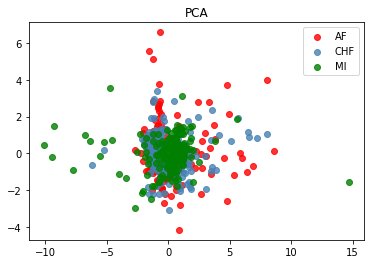

In [322]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=4)
pca_af = pca.fit(atrial_f_m).transform(atrial_f_m)
pca_chf = pca.fit(congestive_h_m).transform(congestive_h_m)
pca_mi = pca.fit(myocardial_i_m).transform(myocardial_i_m)

fig = plt.figure()
#ax = Axes3D(fig)

for i in range(0,len(pca_af)):
    a = plt.scatter(pca_af[i,0],pca_af[i,1],color='red',alpha=0.8)
        
for i in range(0,len(pca_chf)):      
    b = plt.scatter(pca_chf[i,0],pca_chf[i,1],color='steelblue',alpha=0.8)
            
for i in range(0,len(pca_mi)):
    c = plt.scatter(pca_mi[i,0],pca_mi[i,1],color="green",alpha=0.8)

plt.title("PCA")
ax.set_xlabel('Componente P 1')
ax.set_ylabel('Componente P 2')
#ax.set_zlabel('Componente P 3')
plt.legend((a,b,c),("AF","CHF","MI"))
#plt.xlim(-10,0)
#plt.ylim(-10,0)
#ax.set_zlim(-0.06,0)
#for angle in range(0, 360):
   # ax.view_init(30, 40)

Accuracy :  0.8616352201257862


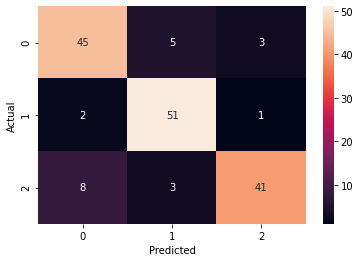

In [475]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=8)
pca_af = pca.fit(atrial_f_m).transform(atrial_f_m)
pca_chf = pca.fit(congestive_h_m).transform(congestive_h_m)
pca_mi = pca.fit(myocardial_i_m).transform(myocardial_i_m)

pca_af1 = pd.DataFrame(pca_af)
pca_chf2 = pd.DataFrame(pca_chf)
pca_mi3 = pd.DataFrame(pca_mi)

y1= a_f['cond_id'].tolist()
y2= c_c['cond_id'].tolist()
y3= m_i['cond_id'].tolist()

y=y1+y2+y3
p=np.array(y)

X=pd.concat([pca_af1,pca_chf2,pca_mi3],ignore_index=True)

X_train,X_test,y_train,y_test = train_test_split(X,targets,test_size=0.25,random_state=1)

from sklearn.ensemble import ExtraTreesClassifier

classifier = ExtraTreesClassifier()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

classifier.fit(X_train, y_train)

X_test = sc.fit_transform(X_test)
y_pred = classifier.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))

confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)


<h2>LDA<h2>

633
196


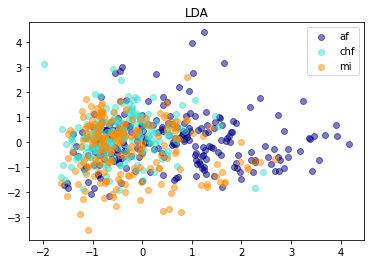

In [286]:
from sklearn import datasets
lda = LinearDiscriminantAnalysis(n_components=2)


target_names = ['af','chf','mi']

y1= a_f['cond_id'].tolist()
y2= c_c['cond_id'].tolist()
y3= m_i['cond_id'].tolist()
t= y1+y2+y3

lda_data = lda.fit(X, t).transform(X)
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

p= np.array(t)

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(lda_data[p == i, 0], lda_data[p == i, 1], alpha=.5, color=color,label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA')
print(len(lda_data))
print(len(y3))

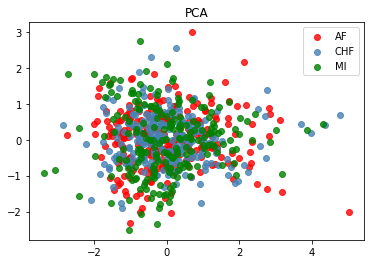

In [258]:
pca = PCA(n_components=2)

lda_af = lda_data[0:249]
lda_chf = lda_data[249:470]
lda_mi = lda_data[470:684]

pca_af2 = pca.fit(lda_af).transform(lda_af)
pca_chf2 = pca.fit(lda_chf).transform(lda_chf)
pca_mi2 = pca.fit(lda_mi).transform(lda_mi)

for i in range(0,len(pca_af2)):
    a = plt.scatter(pca_af2[i,0],pca_af2[i,1],color='red',alpha=0.8)
        
for i in range(0,len(pca_chf2)):      
    b = plt.scatter(pca_chf2[i,0],pca_chf2[i,1],color='steelblue',alpha=0.8)
            
for i in range(0,len(pca_mi2)):
    c = plt.scatter(pca_mi2[i,0],pca_mi2[i,1],color="green",alpha=0.8)
    
plt.title("PCA")
ax.set_xlabel('Componente P 1')
ax.set_ylabel('Componente P 2')
plt.legend((a,b,c),("AF","CHF","MI"))

<h2>Histograms<h2>

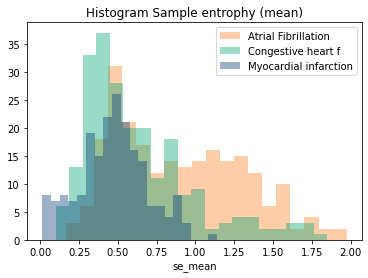

In [201]:
se_af=a_f["se_mean"]
se_cc=c_c["se_mean"]
se_mi=m_i["se_mean"]


sn.distplot(a=se_af,bins=20,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=se_cc,bins=20,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=se_mi,bins=20,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Histogram Sample entrophy (mean)")
plt.legend()


(0.0, 0.4)

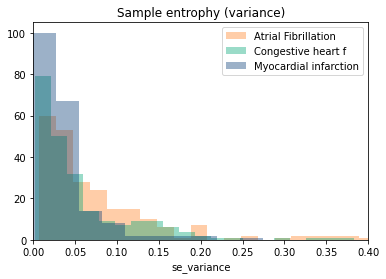

In [202]:
sev_af=a_f["se_variance"]
sev_cc=c_c["se_variance"]
sev_mi=m_i["se_variance"]


sn.distplot(a=sev_af,bins=20,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=sev_cc,bins=20,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=sev_mi,bins=20,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Sample entrophy (variance)")
plt.legend()
plt.xlim(0, 0.4)

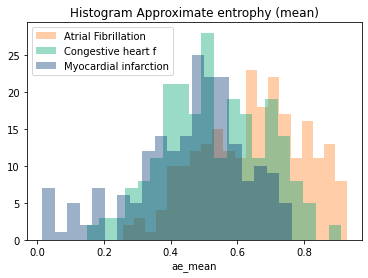

In [206]:
aem_af=a_f["ae_mean"]
aem_cc=c_c["ae_mean"]
aem_mi=m_i["ae_mean"]

#myColors = ['#083D77','#f4633a','#ffd757']

sn.distplot(a=aem_af,bins=20,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=aem_cc,bins=20,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=aem_mi,bins=20,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Histogram Approximate entrophy (mean)")
plt.legend()


(0.0, 0.2)

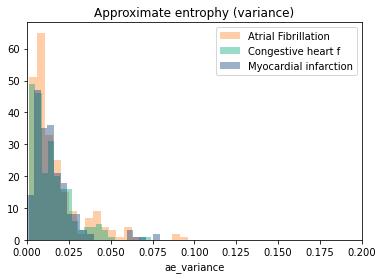

In [208]:
aev_af=a_f["ae_variance"]
aev_cc=c_c["ae_variance"]
aev_mi=m_i["ae_variance"]

#myColors = ['#083D77','#f4633a','#ffd757']

sn.distplot(a=aev_af,bins=20,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=aev_cc,bins=20,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=aev_mi,bins=20,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Approximate entrophy (variance)")
plt.legend()
plt.xlim(0, 0.2)

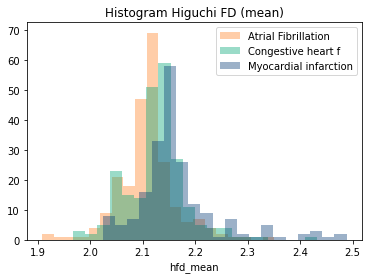

In [209]:
hfd_af=a_f["hfd_mean"]
hfd_cc=c_c["hfd_mean"]
hfd_mi=m_i["hfd_mean"]


sn.distplot(a=hfd_af,bins=20,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=hfd_cc,bins=20,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=hfd_mi,bins=20,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Histogram Higuchi FD (mean)")
plt.legend()

(0.0, 0.015)

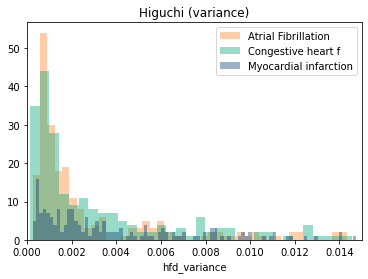

In [210]:
hfdv_af=a_f["hfd_variance"]
hfdv_cc=c_c["hfd_variance"]
hfdv_mi=m_i["hfd_variance"]


sn.distplot(a=hfdv_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=hfdv_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=hfdv_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Higuchi (variance)")
plt.legend()
plt.xlim(0, 0.015)

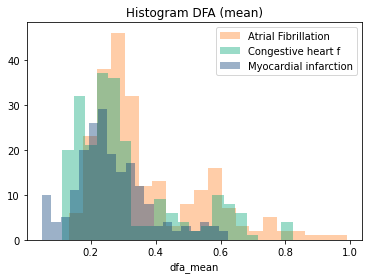

In [212]:
dfa_af=a_f["dfa_mean"]
dfa_cc=c_c["dfa_mean"]
dfa_mi=m_i["dfa_mean"]


sn.distplot(a=dfa_af,bins=20,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=dfa_cc,bins=20,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=dfa_mi,bins=20,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Histogram DFA (mean)")
plt.legend()

(0.0, 0.04)

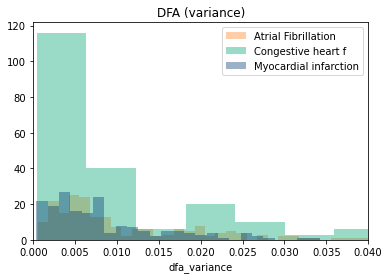

In [215]:
dfav_af=a_f["dfa_variance"]
dfav_cc=c_c["dfa_variance"]
dfav_mi=m_i["dfa_variance"]


sn.distplot(a=dfav_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=dfav_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=dfav_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("DFA (variance)")
plt.legend()
plt.xlim(0, 0.04)

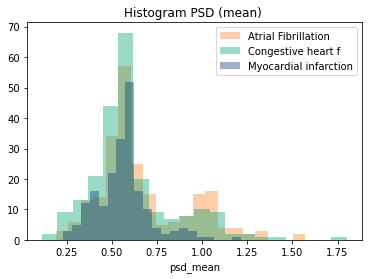

In [216]:
psd_af=a_f["psd_mean"]
psd_cc=c_c["psd_mean"]
psd_mi=m_i["psd_mean"]


sn.distplot(a=psd_af,bins=20,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=psd_cc,bins=20,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=psd_mi,bins=20,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Histogram PSD (mean) ")
plt.legend()

(0.0, 0.2)

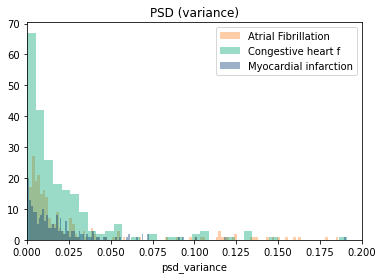

In [217]:
psdv_af=a_f["psd_variance"]
psdv_cc=c_c["psd_variance"]
psdv_mi=m_i["psd_variance"]


sn.distplot(a=psdv_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=psdv_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=psdv_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("PSD (variance)")
plt.legend()
plt.xlim(0, 0.2)

<h2>Scatter plots<h2>

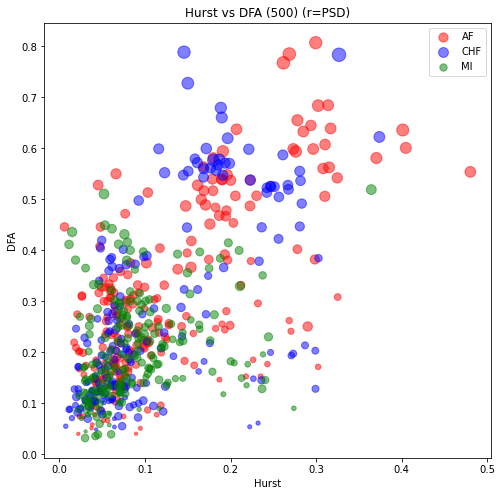

In [11]:
np_pop = np.array(atrial_f["psd_mean"])*100
np_pop1 = np.array(congestive_h["psd_mean"])*100
np_pop2 = np.array(myocardial_i["psd_mean"])*100

fig = plt.figure(figsize=(8,8))
a=plt.scatter(atrial_f["hst_mean"],atrial_f["dfa_mean"],color='red',alpha=0.5,s=np_pop)
b=plt.scatter(congestive_h["hst_mean"],congestive_h["dfa_mean"],color='blue',alpha=0.5,s=np_pop1)
c=plt.scatter(myocardial_i["hst_mean"],myocardial_i["dfa_mean"],color='green',alpha=0.5,s=np_pop2)

plt.title("Hurst vs DFA (500) (r=PSD)")
plt.legend((a,b,c),("AF","CHF","MI"))
plt.axis
plt.xlabel("Hurst")
plt.ylabel("DFA")
plt.savefig(('HurstvsDFA (100).png'))
plt.show()

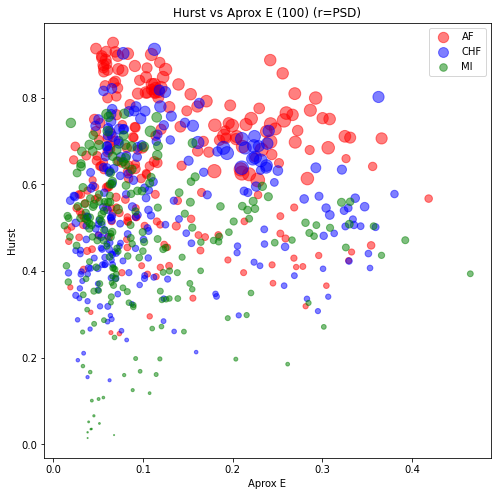

In [224]:
np_pop = np.array(atrial_f["se_mean"])*100
np_pop1 = np.array(congestive_h["se_mean"])*100
np_pop2 = np.array(myocardial_i["se_mean"])*100

fig = plt.figure(figsize=(8,8))
a=plt.scatter(atrial_f["hst_mean"],atrial_f["ae_mean"],color='red',alpha=0.5,s=np_pop)
b=plt.scatter(congestive_h["hst_mean"],congestive_h["ae_mean"],color='blue',alpha=0.5,s=np_pop1)
c=plt.scatter(myocardial_i["hst_mean"],myocardial_i["ae_mean"],color='green',alpha=0.5,s=np_pop2)

plt.title("Hurst vs Aprox E (100) (r=PSD)")
plt.legend((a,b,c),("AF","CHF","MI"))
plt.axis
plt.xlabel("Aprox E")
plt.ylabel("Hurst")
plt.show()

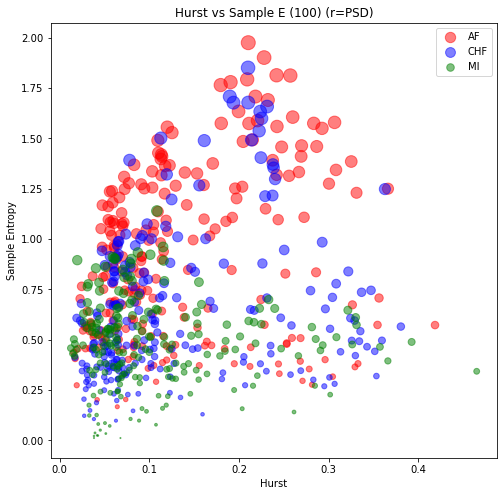

In [226]:
np_pop = np.array(atrial_f["se_mean"])*100
np_pop1 = np.array(congestive_h["se_mean"])*100
np_pop2 = np.array(myocardial_i["se_mean"])*100

fig = plt.figure(figsize=(8,8))
a=plt.scatter(atrial_f["hst_mean"],atrial_f["se_mean"],color='red',alpha=0.5,s=np_pop)
b=plt.scatter(congestive_h["hst_mean"],congestive_h["se_mean"],color='blue',alpha=0.5,s=np_pop1)
c=plt.scatter(myocardial_i["hst_mean"],myocardial_i["se_mean"],color='green',alpha=0.5,s=np_pop2)

plt.title("Hurst vs Sample E (100) (r=PSD)")
plt.legend((a,b,c),("AF","CHF","MI"))
plt.axis
plt.xlabel("Hurst")
plt.ylabel("Sample Entropy")
plt.show()

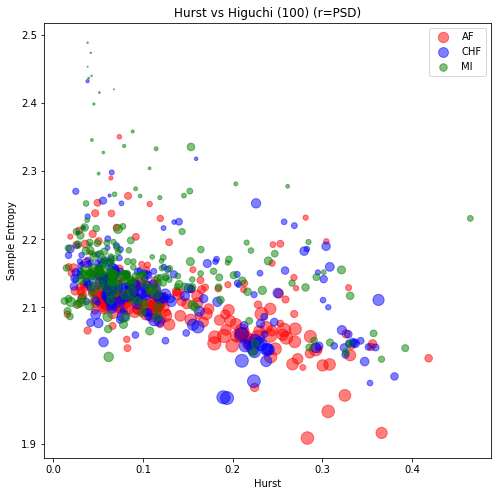

In [225]:
np_pop = np.array(atrial_f["se_mean"])*100
np_pop1 = np.array(congestive_h["se_mean"])*100
np_pop2 = np.array(myocardial_i["se_mean"])*100

fig = plt.figure(figsize=(8,8))
a=plt.scatter(atrial_f["hst_mean"],atrial_f["hfd_mean"],color='red',alpha=0.5,s=np_pop)
b=plt.scatter(congestive_h["hst_mean"],congestive_h["hfd_mean"],color='blue',alpha=0.5,s=np_pop1)
c=plt.scatter(myocardial_i["hst_mean"],myocardial_i["hfd_mean"],color='green',alpha=0.5,s=np_pop2)

plt.title("Hurst vs Higuchi (100) (r=PSD)")
plt.legend((a,b,c),("AF","CHF","MI"))
plt.axis
plt.xlabel("Hurst")
plt.ylabel("Sample Entropy")
plt.show()

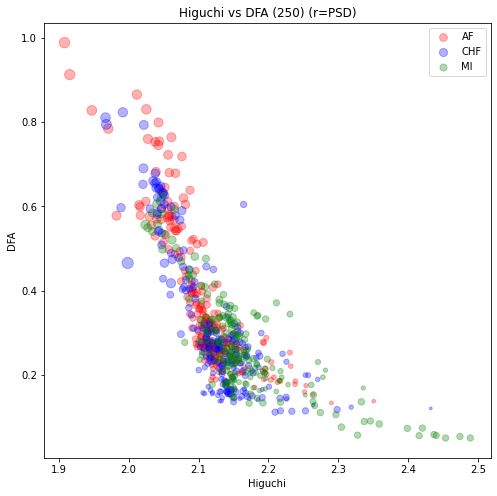

In [228]:
np_pop = np.array(atrial_f["psd_mean"])*70
np_pop1 = np.array(congestive_h["psd_mean"])*70
np_pop2 = np.array(myocardial_i["psd_mean"])*70

fig = plt.figure(figsize=(8,8))

a=plt.scatter(atrial_f["hfd_mean"],atrial_f["dfa_mean"],color='red',alpha=0.3,s=np_pop)
b=plt.scatter(congestive_h["hfd_mean"],congestive_h["dfa_mean"],color='blue',alpha=0.3,s=np_pop1)
c=plt.scatter(myocardial_i["hfd_mean"],myocardial_i["dfa_mean"],color='green',alpha=0.3,s=np_pop2)

plt.title("Higuchi vs DFA (250) (r=PSD)")
plt.axis
plt.xlabel("Higuchi")
plt.ylabel("DFA")
plt.legend((a,b,c),("AF","CHF","MI"))

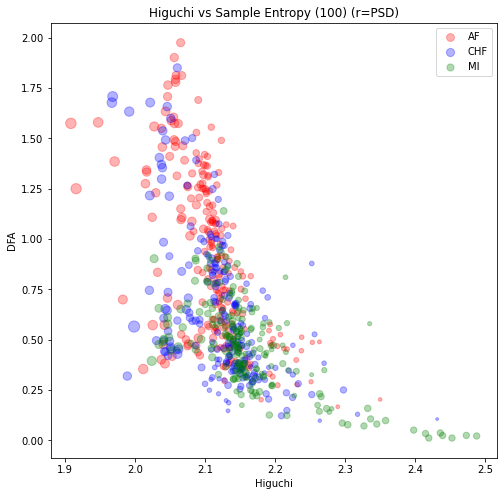

In [229]:
np_pop = np.array(atrial_f["psd_mean"])*70
np_pop1 = np.array(congestive_h["psd_mean"])*70
np_pop2 = np.array(myocardial_i["psd_mean"])*70

fig = plt.figure(figsize=(8,8))

a=plt.scatter(atrial_f["hfd_mean"],atrial_f["se_mean"],color='red',alpha=0.3,s=np_pop)
b=plt.scatter(congestive_h["hfd_mean"],congestive_h["se_mean"],color='blue',alpha=0.3,s=np_pop1)
c=plt.scatter(myocardial_i["hfd_mean"],myocardial_i["se_mean"],color='green',alpha=0.3,s=np_pop2)

plt.title("Higuchi vs Sample Entropy (100) (r=PSD)")
plt.axis
plt.xlabel("Higuchi")
plt.ylabel("DFA")
plt.legend((a,b,c),("AF","CHF","MI"))

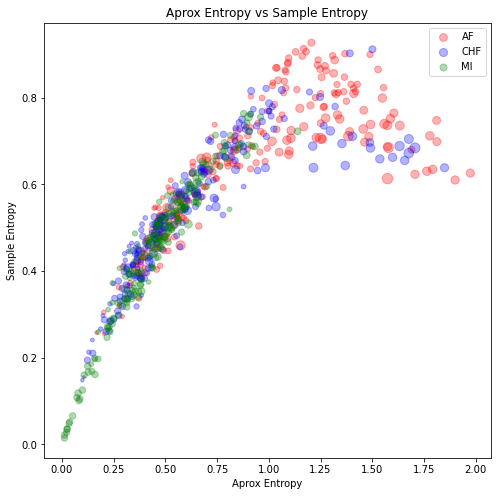

In [230]:
np_pop = np.array(atrial_f["psd_mean"])*70
np_pop1 = np.array(congestive_h["psd_mean"])*70
np_pop2 = np.array(myocardial_i["psd_mean"])*70

fig = plt.figure(figsize=(8,8))

a=plt.scatter(atrial_f["se_mean"],atrial_f["ae_mean"],color='red',alpha=0.3,s=np_pop)
b=plt.scatter(congestive_h["se_mean"],congestive_h["ae_mean"],color='blue',alpha=0.3,s=np_pop1)
c=plt.scatter(myocardial_i["se_mean"],myocardial_i["ae_mean"],color='green',alpha=0.3,s=np_pop2)

plt.title("Aprox Entropy vs Sample Entropy")
plt.axis
plt.xlabel("Aprox Entropy")
plt.ylabel("Sample Entropy")
plt.legend((a,b,c),("AF","CHF","MI"))

<h2>Train datasets<h2>

In [139]:
#Split data to test and train groups
X_train,X_test,y_train,y_test = train_test_split(X,targets,test_size=0.20,random_state=1)
print(len(X_train))
print(len(y_train))

526
526


<h2>Logistic regression <h2>

Accuracy:  0.33070866141732286


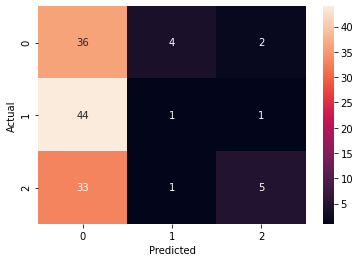

In [373]:
from sklearn.preprocessing import StandardScaler

#Logistic Regression function
logistic_regression= LogisticRegression(max_iter=20000)
sc = StandardScaler()

#Training
X_train = sc.fit_transform(X_train)
logistic_regression.fit(X_train,y_train)
X_test = sc.fit_transform(X_test)

#Testing
y_pred=logistic_regression.predict(X_test)
y_test=np.array(y_test)

#Confussion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

<h2>K nearest neightbors<h2>

In [141]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

#Scale train set
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Training
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)

#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))

#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

knn.kneighbors_graph()

Accuracy of K-NN classifier on training set: 0.76
Accuracy of K-NN classifier on test set: 0.55


<526x526 sparse matrix of type '<class 'numpy.float64'>'
	with 1578 stored elements in Compressed Sparse Row format>

<h2>Gaussian Naive Bayes<h2>

In [142]:
from sklearn.naive_bayes import GaussianNB

#Gaussian Function
gnb = GaussianNB()

#Training
y_pred = gnb.fit(X_train, y_train).predict(X_test)

#Testing
print("Number of mislabeled points out of a total %d points : %d" 
      % (X_test.shape[0], (y_test != y_pred).sum()))
acc=1-(y_test != y_pred).sum()/X_test.shape[0]
print("Accuracy : ", acc)

Number of mislabeled points out of a total 132 points : 72
Accuracy :  0.4545454545454546


<h2>Bernoulli Naive Bayes<h2>

In [168]:
from sklearn.naive_bayes import BernoulliNB

#Bernoulli function
bnb = BernoulliNB()

#Training
y_pred = bnb.fit(X_train, y_train).predict(X_test)

#Testing
print("Number of mislabeled points out of a total %d points : %d" 
      % (X_test.shape[0], (y_test != y_pred).sum()))
acc=1-(y_test != y_pred).sum()/X_test.shape[0]
print("Accuracy : ", acc)

Number of mislabeled points out of a total 137 points : 74
Accuracy :  0.45985401459854014


<h2>Multi-layer Perceptron<h2>

0.3779527559055118


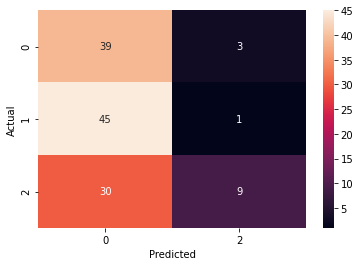

In [371]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

#Scale training data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

#Neural Network
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1,max_iter=20000)

#Training
clf.fit(X_train, y_train)
X_test = sc.fit_transform(X_test)

#Score
y_pred = clf.predict(X_test)
print(clf.score(X_test, y_test))

#Confussion matrix
confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

<h2>Random forest<h2>


Accuracy :  0.7244094488188977


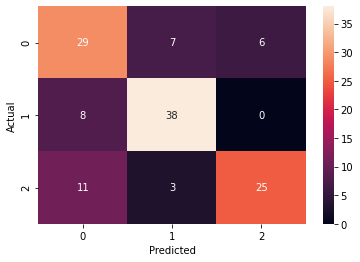

In [374]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


classifier = RandomForestClassifier()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

classifier.fit(X_train, y_train)

X_test = sc.fit_transform(X_test)
y_pred = classifier.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))

confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)


<h2>Extra trees classifier<h2>

Accuracy :  0.8110236220472441


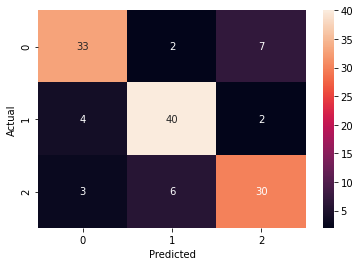

In [375]:
from sklearn.ensemble import ExtraTreesClassifier

classifier = ExtraTreesClassifier()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

classifier.fit(X_train, y_train)

X_test = sc.fit_transform(X_test)
y_pred = classifier.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))

confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

<h2>Ada Boost<h2>

Accuracy :  0.8110236220472441


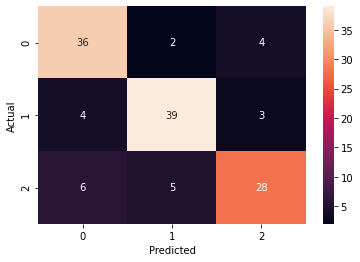

In [370]:
from sklearn.ensemble import AdaBoostClassifier

cassifier = AdaBoostClassifier(n_estimators=100)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))

confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)


<h2>Voting Classifier<h2>

In [252]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5) 
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.62 (+/- 0.02) [Ensemble]


In [ ]:
import 